# Strong business tester

This notebook tries to test if a business is strong based on some financial parameters:

* Strong free cash flow
* Strong balance sheet

In [1]:
import matplotlib.pyplot as plt

In [2]:
from yahooquery import Ticker

In [3]:
ticker = Ticker('MRNA')

In [10]:
ticker.summary_detail['MRNA']

{'maxAge': 1,
 'priceHint': 2,
 'previousClose': 118.29,
 'open': 118.01,
 'dayLow': 117.815,
 'dayHigh': 120.14,
 'regularMarketPreviousClose': 118.29,
 'regularMarketOpen': 118.01,
 'regularMarketDayLow': 117.815,
 'regularMarketDayHigh': 120.14,
 'payoutRatio': 0.0,
 'beta': 1.626476,
 'trailingPE': 10.336522,
 'forwardPE': -27.644186,
 'volume': 2436934,
 'regularMarketVolume': 2436934,
 'averageVolume': 3385261,
 'averageVolume10days': 3000310,
 'averageDailyVolume10Day': 3000310,
 'bid': 118.79,
 'ask': 119.0,
 'bidSize': 1800,
 'askSize': 800,
 'marketCap': 45314314240,
 'fiftyTwoWeekLow': 115.03,
 'fiftyTwoWeekHigh': 217.25,
 'priceToSalesTrailing12Months': 3.0091183,
 'fiftyDayAverage': 127.025,
 'twoHundredDayAverage': 151.93002,
 'trailingAnnualDividendRate': 0.0,
 'trailingAnnualDividendYield': 0.0,
 'currency': 'USD',
 'fromCurrency': None,
 'toCurrency': None,
 'lastMarket': None,
 'coinMarketCapLink': None,
 'algorithm': None,
 'tradeable': False}

In [9]:
ticker.summary_detail['MRNA']['fiftyTwoWeekLow']

115.03

In [12]:
fiftyTwoWeekHigh = ticker.summary_detail['MRNA']['fiftyTwoWeekHigh']
fiftyTwoWeekHigh

217.25

In [16]:
fiftyTwoWeekDiff = ticker.summary_detail['MRNA']['fiftyTwoWeekHigh'] - ticker.summary_detail['MRNA']['fiftyTwoWeekLow']
fiftyTwoWeekDiff

102.22

In [15]:
volatility = fiftyTwoWeekDiff / ticker.summary_detail['MRNA']['fiftyTwoWeekLow']
volatility

0.8886377466747805

## Cash flow analysis

In [4]:
cash_flow = ticker.cash_flow()

In [5]:
type(cash_flow)

pandas.core.frame.DataFrame

In [6]:
cash_flow.columns

Index(['asOfDate', 'periodType', 'currencyCode', 'AmortizationOfSecurities',
       'BeginningCashPosition', 'CapitalExpenditure',
       'CashFlowFromContinuingFinancingActivities',
       'CashFlowFromContinuingInvestingActivities',
       'CashFlowFromContinuingOperatingActivities', 'ChangeInAccountPayable',
       'ChangeInAccruedExpense', 'ChangeInCashSupplementalAsReported',
       'ChangeInIncomeTaxPayable', 'ChangeInInventory',
       'ChangeInOtherCurrentAssets', 'ChangeInOtherCurrentLiabilities',
       'ChangeInOtherWorkingCapital', 'ChangeInPayable',
       'ChangeInPayablesAndAccruedExpense', 'ChangeInPrepaidAssets',
       'ChangeInReceivables', 'ChangeInTaxPayable', 'ChangeInWorkingCapital',
       'ChangesInAccountReceivables', 'ChangesInCash', 'CommonStockIssuance',
       'CommonStockPayments', 'DeferredIncomeTax', 'DeferredTax',
       'DepreciationAmortizationDepletion', 'DepreciationAndAmortization',
       'EndCashPosition', 'FinancingCashFlow', 'FreeCashFlow',
  

In [7]:
cash_flow[['asOfDate', 'FreeCashFlow']].style.format({
    'FreeCashFlow': '{:,.2f}'.format,
})

,asOfDate,FreeCashFlow
symbol,,
MRNA,2019-12-31 00:00:00,"-490,522,000.00"
MRNA,2020-12-31 00:00:00,"1,959,523,000.00"
MRNA,2021-12-31 00:00:00,"13,336,000,000.00"
MRNA,2022-12-31 00:00:00,"4,581,000,000.00"
MRNA,2022-12-31 00:00:00,"4,581,000,000.00"


### Free cash flow

In [8]:
free_cash_flow = cash_flow[['asOfDate', 'FreeCashFlow']]
free_cash_flow = free_cash_flow.set_index('asOfDate')

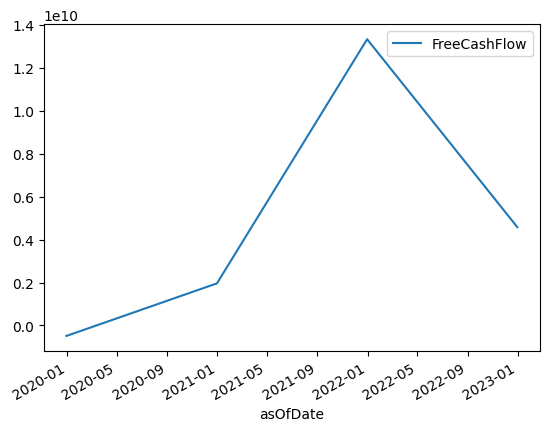

In [9]:
free_cash_flow.plot();

## Balance sheet analysis

In [10]:
balance_sheet = ticker.balance_sheet(frequency='Quarterly')

In [11]:
type(balance_sheet)

pandas.core.frame.DataFrame

In [12]:
balance_sheet.columns

Index(['asOfDate', 'periodType', 'currencyCode', 'AccountsPayable',
       'AccountsReceivable', 'AccruedInterestReceivable',
       'AccumulatedDepreciation', 'AdditionalPaidInCapital',
       'AllowanceForDoubtfulAccountsReceivable', 'AvailableForSaleSecurities',
       'CapitalLeaseObligations', 'CapitalStock', 'CashAndCashEquivalents',
       'CashCashEquivalentsAndShortTermInvestments', 'CommonStock',
       'CommonStockEquity', 'ConstructionInProgress', 'CurrentAccruedExpenses',
       'CurrentAssets', 'CurrentCapitalLeaseObligation',
       'CurrentDebtAndCapitalLeaseObligation', 'CurrentDeferredLiabilities',
       'CurrentDeferredRevenue', 'CurrentLiabilities', 'FinishedGoods',
       'GainsLossesNotAffectingRetainedEarnings', 'GrossAccountsReceivable',
       'GrossPPE', 'HedgingAssetsCurrent', 'IncomeTaxPayable', 'Inventory',
       'InvestedCapital', 'InvestmentinFinancialAssets',
       'InvestmentsAndAdvances', 'LandAndImprovements', 'Leases',
       'LongTermCapitalLease

### Debt vs Equity

In [13]:
debt_vs_equity = balance_sheet[['asOfDate', 'TotalDebt', 'CommonStockEquity']]
debt_vs_equity = debt_vs_equity.set_index('asOfDate')

In [14]:
debt_vs_equity.style.format({
    'TotalDebt': '{:,.2f}'.format,    
    'CommonStockEquity': '{:,.2f}'.format,
})

,TotalDebt,CommonStockEquity
asOfDate,,
2022-03-31 00:00:00,"947,000,000.00","17,075,000,000.00"
2022-06-30 00:00:00,"728,000,000.00","17,985,000,000.00"
2022-09-30 00:00:00,"1,261,000,000.00","17,992,000,000.00"
2022-12-31 00:00:00,"1,004,000,000.00","19,123,000,000.00"


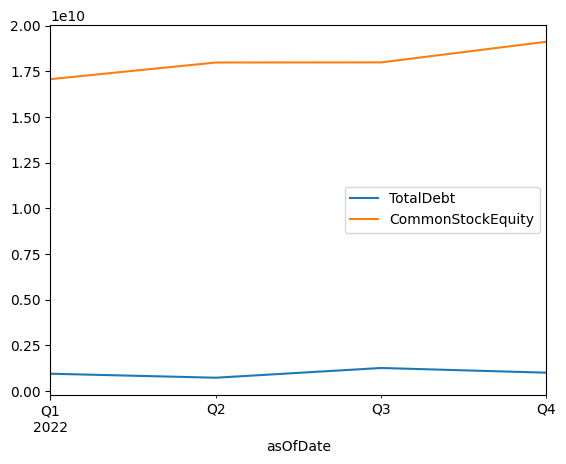

In [15]:
debt_vs_equity.plot();

### Debt/Equity ratio

In [16]:
balance_sheet['TotalDebt/CommonStockEquity']=balance_sheet['TotalDebt']/balance_sheet['CommonStockEquity']

debt_equity_ratio = balance_sheet[['asOfDate', 'TotalDebt/CommonStockEquity']]
debt_equity_ratio = debt_equity_ratio.set_index('asOfDate')

In [17]:
debt_equity_ratio.style.format({
    'TotalDebt/CommonStockEquity': '{:,.2%}'.format
})

,TotalDebt/CommonStockEquity
asOfDate,
2022-03-31 00:00:00,5.55%
2022-06-30 00:00:00,4.05%
2022-09-30 00:00:00,7.01%
2022-12-31 00:00:00,5.25%


In [18]:
debt_equity_ratio.index

DatetimeIndex(['2022-03-31', '2022-06-30', '2022-09-30', '2022-12-31'], dtype='datetime64[ns]', name='asOfDate', freq=None)

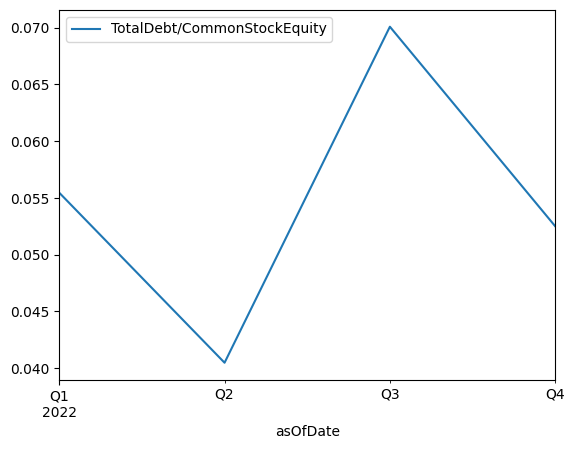

In [19]:
debt_equity_ratio.plot();